In [1]:
pip install -U ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/c6/12/a869b9f81c992a179a27d76154b3ae3c1a65a43c9ec117437762093a75ca/ydata_profiling-4.6.3-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.6.3-py2.py3-none-any.whl.metadata (20 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp311-cp311-win_amd64.whl (663 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
Using cached ydata_profiling-4.6.3-py2.py3-none-any.whl (357 kB)
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   --------------- ---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import ydata_profiling

In [17]:
df = pd.read_parquet("F:/Polytechnique/gradient-gurus-ds-project/mdsb-2023/train.parquet")

In [4]:
print(df.head())

print(df.info())

print(df.describe())

                counter_id              counter_name    site_id  \
48321  100007049-102007049  28 boulevard Diderot E-O  100007049   
48324  100007049-102007049  28 boulevard Diderot E-O  100007049   
48327  100007049-102007049  28 boulevard Diderot E-O  100007049   
48330  100007049-102007049  28 boulevard Diderot E-O  100007049   
48333  100007049-102007049  28 boulevard Diderot E-O  100007049   

                  site_name  bike_count                date  \
48321  28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324  28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327  28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330  28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333  28 boulevard Diderot         9.0 2020-09-01 18:00:00   

      counter_installation_date         coordinates counter_technical_id  \
48321                2013-01-18  48.846028,2.375429          Y2H15027244   
48324                2013-01-18  48.846028,2.375429          Y2H15

In [5]:
distinct_df = df[['counter_id', 'coordinates']].drop_duplicates().head(100)
print(distinct_df)

                 counter_id         coordinates
48321   100007049-102007049  48.846028,2.375429
57884   100007049-101007049  48.846028,2.375429
67490   100036718-104036718      48.83436,2.377
77189   100036718-103036718      48.83436,2.377
87161   100036719-104036719    48.85372,2.35702
96968   100036719-103036719    48.85372,2.35702
116705  100042374-110042374     48.8484,2.27586
126152  100042374-109042374     48.8484,2.27586
135512         100044493-SC    48.86149,2.37376
264221  100047542-103047542    48.89172,2.38531
273932  100047542-104047542    48.89172,2.38531
293567  100047545-103047545  48.890457,2.368852
303599  100047545-104047545  48.890457,2.368852
313454  100047546-104047546   48.829523,2.38699
323423  100047546-103047546   48.829523,2.38699
333389  100047547-104047547    48.82636,2.30303
343292  100047547-103047547    48.82636,2.30303
353162  100047548-103047548    48.89141,2.38482
363056  100047548-104047548    48.89141,2.38482
398510  100049407-353255860  48.840801,2

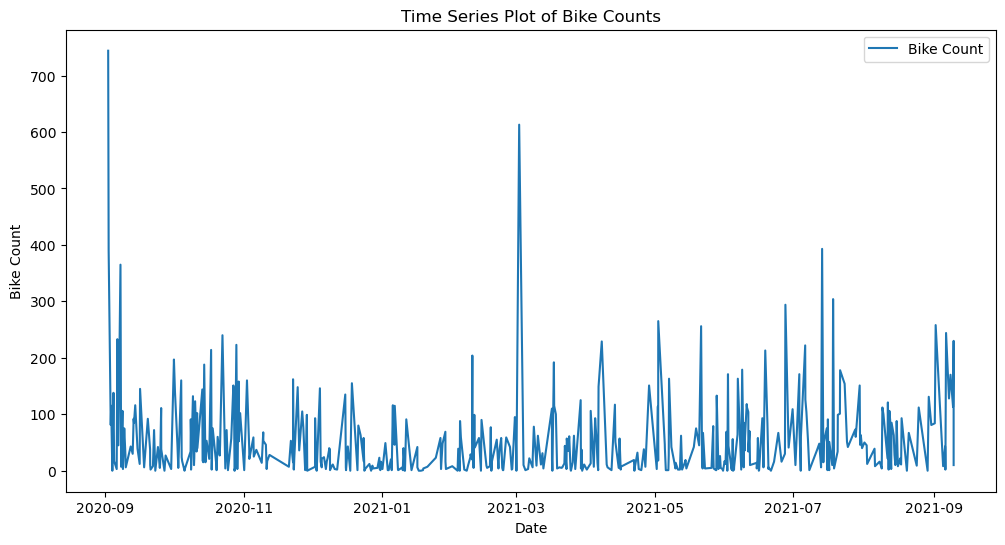

In [21]:
#Time Series Plot of Bike Counts

df = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed
df = df.sort_values(by='date')



plt.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['bike_count'], label='Bike Count')
plt.title('Time Series Plot of Bike Counts')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.legend()
plt.show()



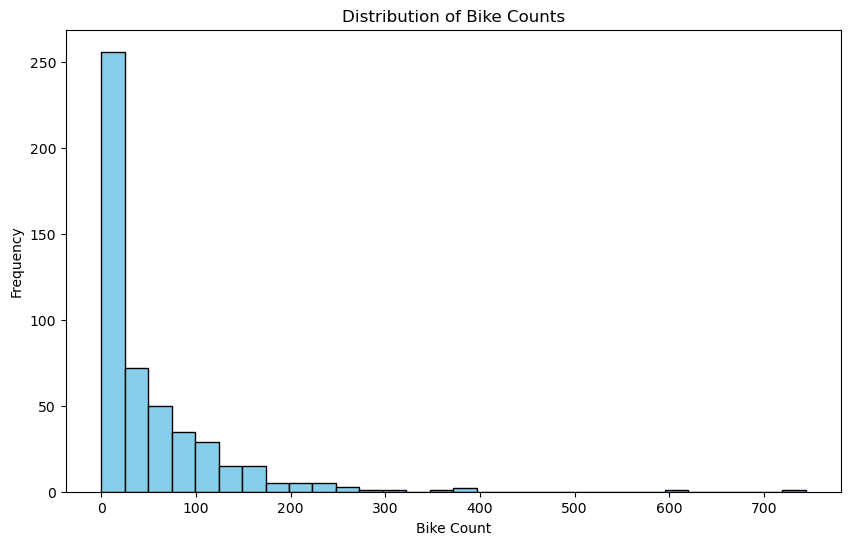

In [22]:
# Distribution of Bike Counts

plt.figure(figsize=(10, 6))
plt.hist(df['bike_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bike Counts')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_16440\801333679.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='site_name', y='bike_count', data=df, ci=None, palette="coolwarm")


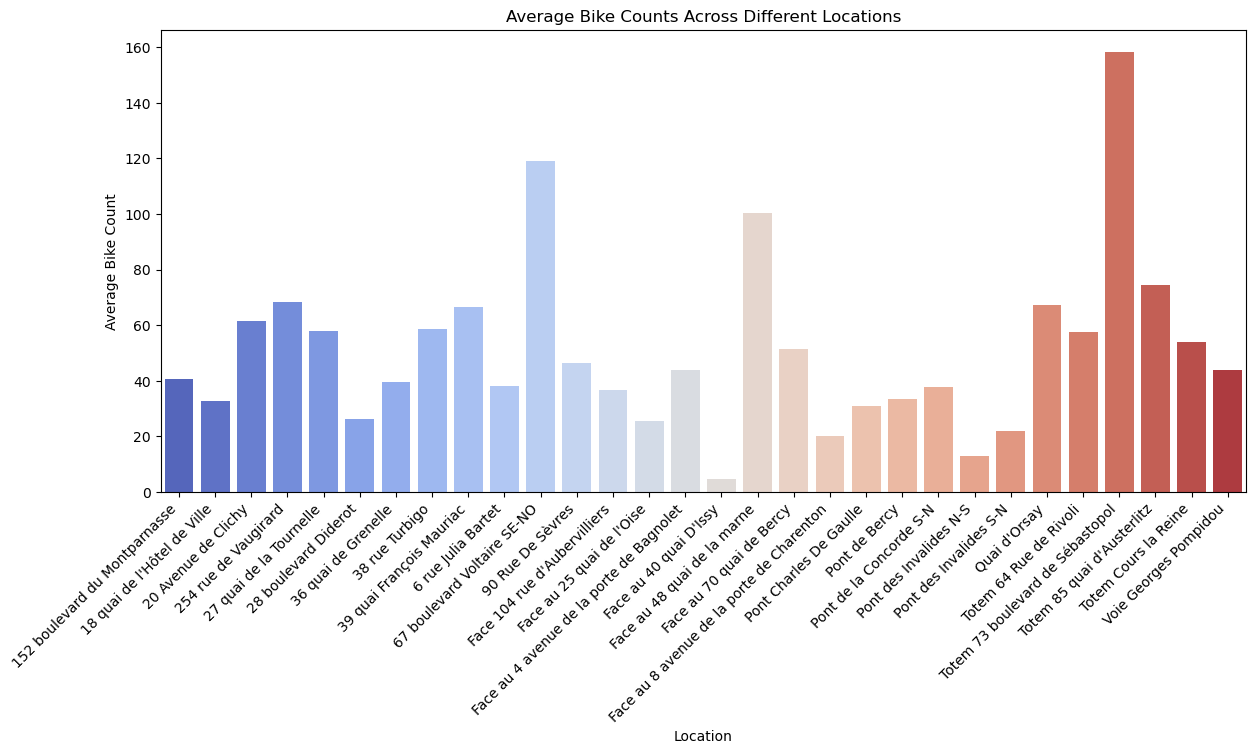

In [25]:
# Bike Counts Across Different Locations
plt.figure(figsize=(14, 6))
sns.barplot(x='site_name', y='bike_count', data=df, ci=None, palette="coolwarm")
plt.title('Average Bike Counts Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Average Bike Count')
plt.xticks(rotation=45, ha='right')
plt.show()


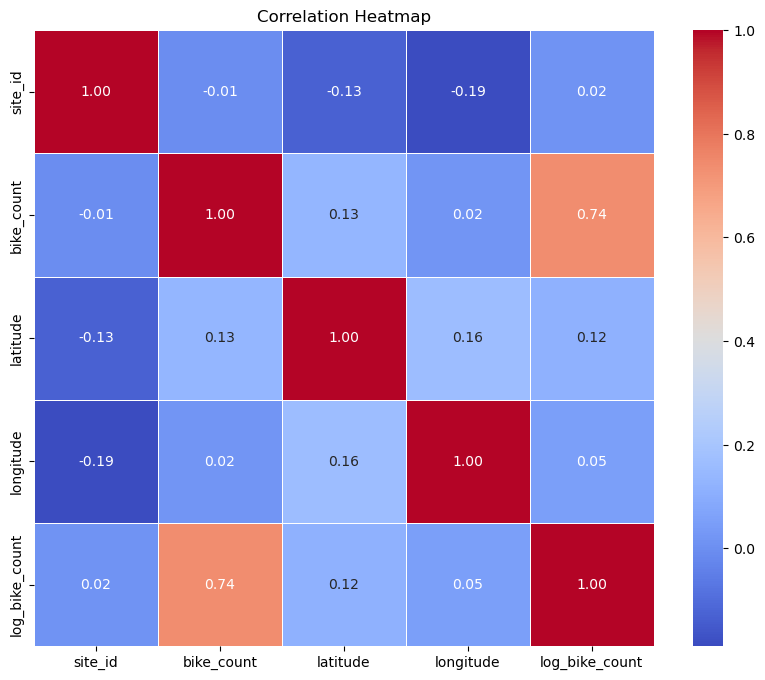

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Correlation Heatmap
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


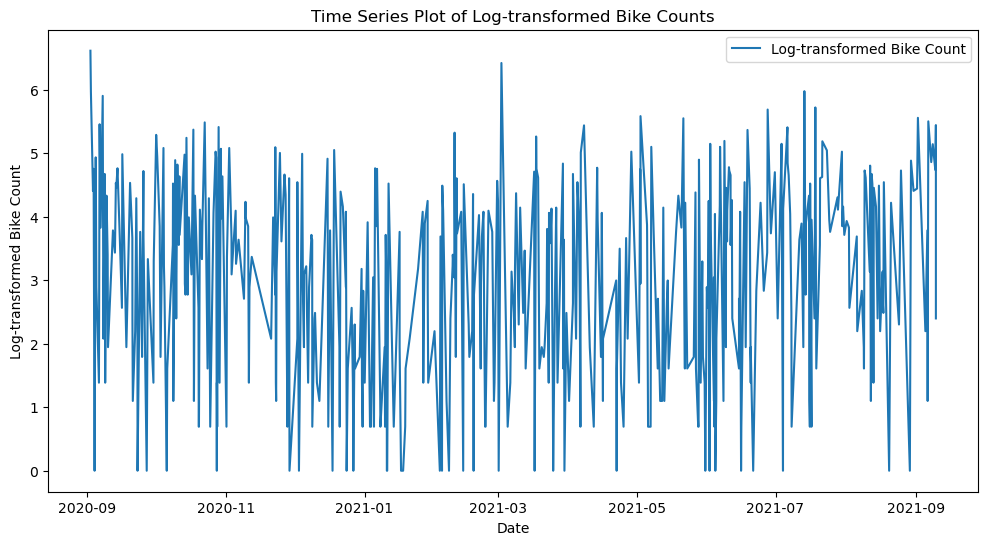

In [24]:
# df = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed
df = df.sort_values(by='date')


plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['log_bike_count'], label='Log-transformed Bike Count')
plt.title('Time Series Plot of Log-transformed Bike Counts')
plt.xlabel('Date')
plt.ylabel('Log-transformed Bike Count')
plt.legend()
plt.show()


In [11]:
df['date'] = pd.to_datetime(df['date'])

# Create a new column for the combination of year and month
df['year_month'] = df['date'].dt.to_period('M')

# Display distinct year-month combinations
distinct_years_months = df['year_month'].unique()
print("Distinct Year-Month Combinations:")
print(distinct_years_months)



Distinct Year-Month Combinations:
<PeriodArray>
['2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
 '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']
Length: 13, dtype: period[M]


In [12]:
df = pd.read_parquet("F:/Polytechnique/gradient-gurus-ds-project/mdsb-2023/final_test.parquet")

In [13]:
df.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd


X = df[['counter_name', 'site_name', 'date', 'counter_installation_date', 'latitude', 'longitude']]
y = df['log_bike_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['latitude', 'longitude']
numeric_transformer = StandardScaler()

categorical_features = ['counter_name', 'site_name', 'date', 'counter_installation_date']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


KeyError: 'log_bike_count'